<div style="width:50%; float:left;">
    <img src="support_files/AIBS_banner.png" width="430" align="left">
</div>

<div style="width:50%; float:right;">
    <img src="support_files/Dipde_Nick_final.png" width="100" height="100" align="right">
</div>

<div style="width:100%; float:left;">
    <hr>
</div>



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h1>Example: Analysis</h1>
<p> In this example, a single internal dipde population receives from a single external dipde population, and the simulation is run long enough (`t_max=.5`) to reach a steady-state.  The value of `dv` used here is unrealistically large, but is chosen to help make intuitive plots of the flux matrices.

In [1]:
%matplotlib inline
import scipy.sparse.linalg as spla
import numpy as np
import dipde
assert dipde.__version__ == '0.2.1'
from dipde.interfaces.access_matrices import get_leak_matrix, get_connection_flux_matrices
from IPython.display import display
import matplotlib.pyplot as plt
import ipywidgets as ipw
import logging
from IPython.display import HTML
logging.disable(logging.CRITICAL)

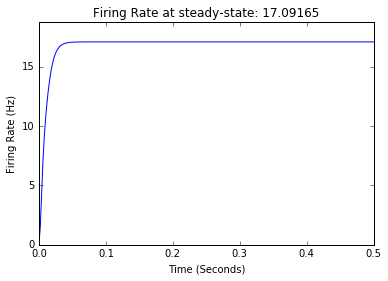

In [3]:
t0 = 0.
dt = .002
dv = .002
v_max = .021
tf = .5
tau_m=.02
weights={'distribution':'delta', 'loc':.008}
bgfr = 100

# Progress bar:
fltp = ipw.FloatProgress(min=0, max=int((tf-t0)/dt))
display(fltp)
def update_callback(n):
    fltp.value += 1

b1 = dipde.ExternalPopulation(bgfr)
i1 = dipde.InternalPopulation(v_min=-v_max, tau_m=tau_m, v_max=v_max, dv=dv, update_method='approx')
b1_i1 = dipde.Connection(b1, i1, 1, weights=weights)
network = dipde.Network([b1, i1], [b1_i1], update_callback=update_callback)
network.run(t0=t0, tf=tf, dt=dt)
plot = i1.plot(title='Firing Rate at steady-state: %5.5f' % i1.firing_rate_record[-1])

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> By using the `get_leak_matrix` and `get_connection_flux_matrices` API calls, we can access the flox matrices associated with the internal population and the connection that drives it.

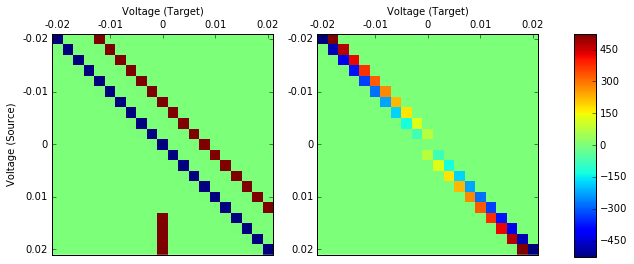

In [4]:
i1 = dipde.InternalPopulation(v_min=-v_max, tau_m=tau_m, v_max=v_max, dv=dv, update_method='approx')
c1 = dipde.Connection(target=i1, nsyn=1, weights=weights)
L = get_leak_matrix(i1, sparse=True)
S, f = get_connection_flux_matrices(c1, sparse=True)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
img_1 = ax[0].imshow(100*S.todense().T, interpolation='none')
img_2 = ax[1].imshow(L.todense().T, interpolation='none')

for ii in [0,1]:
    ax[ii].set_xticks([0,5,10,15,20])
    ax[ii].set_xticklabels([-.02, -.01, 0, .01, .02])
    ax[ii].set_yticks([0,5,10,15,20])
    ax[ii].set_yticklabels([-.02, -.01, 0, .01, .02])
    ax[ii].set_xlabel('Voltage (Target)', )
    ax[ii].xaxis.tick_top()
    ax[ii].xaxis.set_label_position('top') 
ax[0].set_ylabel('Voltage (Source)')


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.2, 0.03, 0.62])
fig.colorbar(img_2, cax=cbar_ax)
plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>We can use these matrices to compute the steady-state probability vector and firing rate without running the simulation. 

In [5]:
M = L+100*S

ew, ev = spla.eigs(M, k=1, sigma=0)
ev = np.squeeze(np.real(ev))
ev = ev/ev.sum()

print 'Steady-state prediction: %5.5f' % ev.dot(100*f)

Steady-state prediction: 17.09165
